In [1]:
%load_ext autoreload
%autoreload 2

from setup import setup_project_env
setup_project_env('~/weatherpy-work')

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from datasrcs.ibtracs import atlantic_tcs
from datasrcs.atcf import btk
from algs.tc_motion import forward_motion, stalls

In [10]:
dorian = btk('al052019')

In [18]:
dorian_specifics = dorian.groupby(['cy', 'yyyymmddhh']).first().reset_index()

In [21]:
dorian_specifics.head()

,cy,yyyymmddhh,basin,technum,tech,tau,lat,lon,vmax,mslp,...,userdata1,userdefine2,userdata2,userdefine3,userdata3,userdefine4,userdata4,userdefine5,userdata5,ts
0,5,2019082212,AL,,BEST,0,9.5,-35.9,15,1009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-22 12:00:00
1,5,2019082218,AL,,BEST,0,9.5,-37.3,15,1009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-22 18:00:00
2,5,2019082300,AL,,BEST,0,9.5,-39.0,20,1009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-23 00:00:00
3,5,2019082306,AL,,BEST,0,9.6,-40.4,20,1012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-23 06:00:00
4,5,2019082312,AL,,BEST,0,9.8,-41.7,25,1012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-23 12:00:00


In [22]:
atcf_cols = dict(
    storm_id='cy',
    timestamp='ts',
    lat='lat',
    lon='lon'
)
dorian_dists, dorian_speeds, dorian_angles = forward_motion(dorian_specifics, cols=atcf_cols)

In [27]:
dorian_specifics['speed_kt'] = dorian_speeds
dorian_specifics['dist_nm'] = dorian_dists

In [49]:
dorian_specifics.loc[41:49]

,cy,yyyymmddhh,basin,technum,tech,tau,lat,lon,vmax,mslp,...,userdata2,userdefine3,userdata3,userdefine4,userdata4,userdefine5,userdata5,ts,speed_kt,dist_nm
41,5,2019090118,AL,,BEST,0,26.5,-77.1,160,910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-01 18:00:00,5.463313,32.779881
42,5,2019090200,AL,,BEST,0,26.6,-77.7,155,914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-02 00:00:00,3.579032,21.474193
43,5,2019090206,AL,,BEST,0,26.6,-78.1,145,916,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-02 06:00:00,1.342104,8.052626
44,5,2019090212,AL,,BEST,0,26.7,-78.2,135,922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-02 12:00:00,2.048245,12.289470
45,5,2019090218,AL,,BEST,0,26.8,-78.4,125,938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-02 18:00:00,0.000000,0.000000
46,5,2019090300,AL,,BEST,0,26.8,-78.4,120,944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-03 00:00:00,1.000676,6.004054
47,5,2019090306,AL,,BEST,0,26.9,-78.4,105,950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-03 06:00:00,2.001351,12.008108
48,5,2019090312,AL,,BEST,0,27.1,-78.4,100,954,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-03 12:00:00,4.810192,28.861152
49,5,2019090318,AL,,BEST,0,27.5,-78.7,95,959,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-03 18:00:00,6.068953,36.413720


In [31]:
bahamas_stall = dorian_specifics[dorian_specifics.speed_kt < 3]
bahamas_stall

,cy,yyyymmddhh,basin,technum,tech,tau,lat,lon,vmax,mslp,...,userdata2,userdefine3,userdata3,userdefine4,userdata4,userdefine5,userdata5,ts,speed_kt,dist_nm
43,5,2019090206,AL,,BEST,0,26.6,-78.1,145,916,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-02 06:00:00,1.342104,8.052626
44,5,2019090212,AL,,BEST,0,26.7,-78.2,135,922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-02 12:00:00,2.048245,12.289470
45,5,2019090218,AL,,BEST,0,26.8,-78.4,125,938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-02 18:00:00,0.000000,0.000000
46,5,2019090300,AL,,BEST,0,26.8,-78.4,120,944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-03 00:00:00,1.000676,6.004054
47,5,2019090306,AL,,BEST,0,26.9,-78.4,105,950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-03 06:00:00,2.001351,12.008108


In [33]:
bahamas_stall.dist_nm.sum()

38.354257863247625

In [3]:
all_tcs = atlantic_tcs()
post_1970_tcs = all_tcs[all_tcs.season.isin(range(1970, 2019))]

/Users/jitang/anaconda/envs/storm_analysis_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3209: DtypeWarning: Columns (3,21,128,148) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [41]:
post_1970_tcs.head()

,sid,season,number,basin,subbasin,name,iso_time,nature,lat,lon,...,bom_gust_per,reunion_gust,reunion_gust_per,usa_seahgt,usa_searad_ne,usa_searad_se,usa_searad_sw,usa_searad_nw,storm_speed,storm_dir
77065,1970138N12281,1970,43,NaN,CS,ALMA,1970-05-17 18:00:00,TS,11.500,-79.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,316.0
77066,1970138N12281,1970,43,NaN,CS,ALMA,1970-05-17 21:00:00,TS,11.575,-79.0676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,315.0
77067,1970138N12281,1970,43,NaN,CS,ALMA,1970-05-18 00:00:00,TS,11.700,-79.2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,312.0
77068,1970138N12281,1970,43,NaN,CS,ALMA,1970-05-18 03:00:00,TS,11.900,-79.4349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,309.0
77069,1970138N12281,1970,43,NaN,CS,ALMA,1970-05-18 06:00:00,TS,12.100,-79.7000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,304.0


In [7]:
in_bbox = post_1970_tcs[
    (post_1970_tcs.lat >= 20) & (post_1970_tcs.lat <= 30)
    & (post_1970_tcs.lon >= -100) & (post_1970_tcs.lon <= -65)
]

In [34]:
dists, speeds, angles = forward_motion(post_1970_tcs, periods=5)  # 30 hr

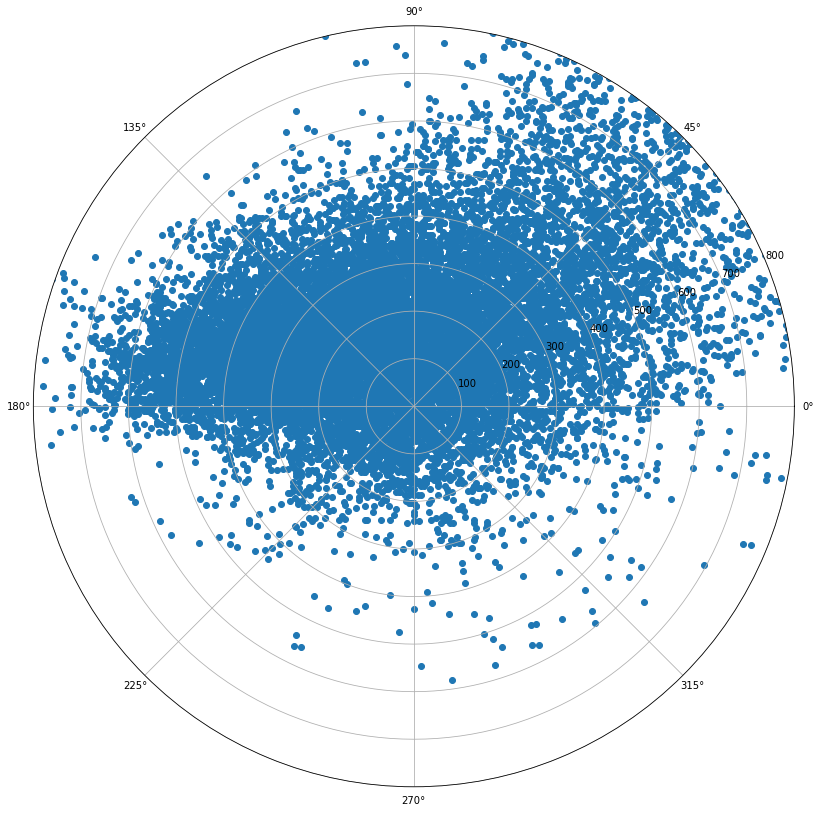

In [37]:
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='polar')
ax.scatter(angles, dists)

ax.set_rmax(800)

In [59]:
dorian_like_stalls = stalls(post_1970_tcs, 40, 5)
dorian_like_stalls_ts = dorian_like_stalls[dorian_like_stalls.nature == 'TS']

In [60]:
dorian_like_stalls_ts.groupby(['season', 'name']).count()['iso_time']

season  name     
1973    GILDA        7
1979    HENRI        2
1982    ALBERTO      1
1984    DIANA        1
        EDOUARD      1
1985    ELENA        1
1989    KAREN        1
        NOT_NAMED    2
1990    CESAR        2
1992    BONNIE       6
        DANIELLE     2
1993    EMILY        1
1994    ALBERTO      2
1995    BARRY        1
        DEAN         1
        OPAL         2
        ROXANNE      1
1998    MITCH        3
1999    BRET         2
        DENNIS       4
2000    FLORENCE     1
        KEITH        3
2001    BARRY        1
        FELIX        2
        MICHELLE     1
2002    EDOUARD      1
        FAY          1
        KYLE         1
2003    NICHOLAS     1
2004    ALEX         2
2005    NATE         2
        OPHELIA      4
2006    GORDON       2
2007    LORENZO      1
2008    BERTHA       3
2009    FRED         2
2011    NATE         3
        NOT_NAMED    1
2012    LESLIE       1
        PATTY        5
2014    ARTHUR       1
2016    BONNIE       2
        NICOLE  

In [62]:
dorian_like_stalls_ts[['season', 'name', 'iso_time', 'nature', 'lat', 'lon', 'wmo_wind', 'wmo_pres']]

,season,name,iso_time,nature,lat,lon,wmo_wind,wmo_pres
80524,1973,GILDA,1973-10-21 00:00:00,TS,25.1,-75.9,45.0,995.0
80526,1973,GILDA,1973-10-21 06:00:00,TS,25.3,-75.8,45.0,NaN
80528,1973,GILDA,1973-10-21 12:00:00,TS,25.4,-75.8,45.0,NaN
80530,1973,GILDA,1973-10-21 18:00:00,TS,25.5,-75.8,35.0,1000.0
80532,1973,GILDA,1973-10-22 00:00:00,TS,25.6,-75.7,35.0,NaN
80534,1973,GILDA,1973-10-22 06:00:00,TS,25.6,-75.6,45.0,NaN
80536,1973,GILDA,1973-10-22 12:00:00,TS,25.6,-75.7,40.0,NaN
85225,1979,HENRI,1979-09-18 06:00:00,TS,21.0,-95.4,60.0,997.0
85227,1979,HENRI,1979-09-18 12:00:00,TS,21.2,-95.7,50.0,1000.0
87303,1982,ALBERTO,1982-06-04 06:00:00,TS,24.9,-84.1,55.0,998.0


In [63]:
atcf_check = stalls(dorian_specifics, 40, 5, cols=atcf_cols)
atcf_check

,cy,yyyymmddhh,basin,technum,tech,tau,lat,lon,vmax,mslp,...,userdata2,userdefine3,userdata3,userdefine4,userdata4,userdefine5,userdata5,ts,speed_kt,dist_nm
43,5,2019090206,AL,,BEST,0,26.6,-78.1,145,916,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-02 06:00:00,1.342104,8.052626
